https://unimibfisicalaboratori.github.io/UnimibFisicaLabStatPythonWebBook/lectures/Lecture_12/EXERCISES.html

In [44]:
import numpy as np, matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL,ExtendedBinnedNLL,BinnedNLL
from scipy.stats import norm
import stats,files

In [45]:
data = stats.toy_Gauss(mean=2, sigma=1,N=10000)

In [46]:
files.write_file('dati2.txt',data.sample)

'success'

<h2>Data

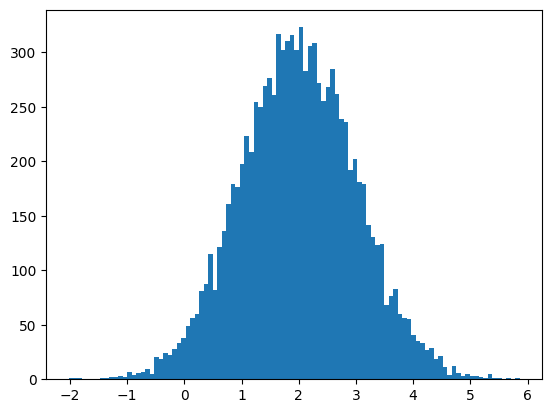

In [47]:
data = files.read_file('dati2.txt')
plt.hist(data,bins=100)
plt.show()

<h2>Unbinned

In [48]:
def func(x,u,sigma):
    return norm.pdf(x,u,sigma)

In [49]:
cost = UnbinnedNLL(data,func)
my_minuit = Minuit(cost,u=0,sigma=1)
my_minuit.migrad()
my_minuit.hesse()
display(my_minuit)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.851e+04                  │              Nfcn = 69               │
│ EDM = 5.4e-10 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ u     │   1.998   │   0.010   │            │            │         │         │       │
│ 1 │ sigma │   1.007   │   0.007   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │        u    sigma │
├───────┼───────────────────┤
│     u │ 0.000101        0 │
│ sigma │        0 5.07e-05 │
└───────┴───────────────────┘

<h2>Binned

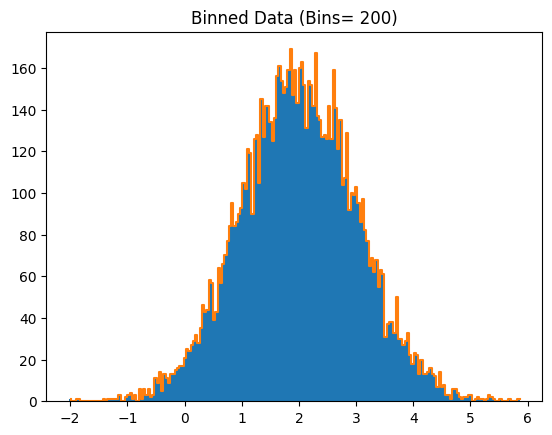

In [50]:
n_bins = 200

bin_data, bin_edges, patches = plt.hist(data,bins=n_bins)
plt.title(f'Binned Data (Bins= {n_bins})')
plt.step(bin_edges[1:], bin_data)
plt.show()

In [51]:
def func2(x,u,sigma):
    return norm.cdf(x,u,sigma)

In [52]:
cost = ExtendedBinnedNLL(bin_data,bin_edges,func2)
my_minuit = Minuit(cost,u=0,sigma=1)
my_minuit.limits['sigma'] = (0,None)
my_minuit.migrad()
my_minuit.hesse()
display(my_minuit)
display(my_minuit.values)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.644e+05 (χ²/ndof = 830.4)│              Nfcn = 69               │
│ EDM = 1.26e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ u     │   1.998   │   0.010   │            │            │         │         │       │
│ 1 │ sigma │   1.007   │   0.007   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │        u    sigma │
├───────┼───────────────────┤
│     u │ 0.000101        0 │
│ sigma │        0 5.07e-05 │
└───────┴───────────────────┘

<ValueView u=1.9979837901401143 sigma=1.006846618585549>